## Polynomials

$$3x^2 + 2x -1$$


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import numpy as np

In [2]:
p = np.poly1d([3, 2, -1])

In [3]:
p

poly1d([ 3,  2, -1])

In [5]:
p(10)

319

In [6]:
p.roots

array([-1.        ,  0.33333333])

In [7]:
p.order

2

In [8]:
p * p

poly1d([ 9, 12, -2, -4,  1])

In [10]:
np.random.seed(0)
x = np.linspace(0, 1, 20)
y = np.cos(x) + 0.3*np.random.rand(20)
p = np.poly1d(np.polyfit(x, y, 3))
p

poly1d([ 1.46593376, -2.5473138 ,  0.72140078,  1.13716393])

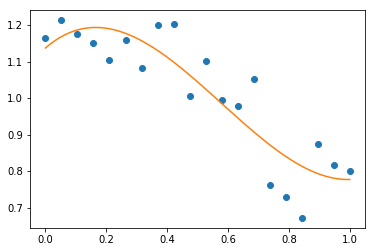

In [13]:
t = np.linspace(0, 1, 200)
plt.plot(x, y, 'o', t, p(t), '-');  

## Loading data files

In [16]:
! dir data

 Volume in drive E has no label.
 Volume Serial Number is 4081-48A6

 Directory of E:\scipy2018\raw\data

01/02/2019  11:47 PM    <DIR>          .
01/02/2019  11:47 PM    <DIR>          ..
01/02/2019  11:47 PM           108,883 elephant.png
01/02/2019  11:51 PM               200 pop.npy
01/02/2019  11:51 PM               610 pop.npz
01/02/2019  11:51 PM               404 pop2.txt
01/02/2019  11:27 PM               154 populations.txt
               5 File(s)        110,251 bytes
               2 Dir(s)  36,138,262,528 bytes free


In [17]:
! cat "data\populations.txt"

# year  hare    lynx    carrot
1900    30e3    4e3     48300
1901    47.2e3  6.1e3   48200
1902    70.2e3  9.8e3   41500
1903    77.4e3  35.2e3  38200


In [18]:
data = np.loadtxt('data/populations.txt')

In [19]:
data.shape

(4, 4)

In [20]:
data

array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.],
       [ 1903., 77400., 35200., 38200.]])

In [21]:
np.savetxt('data\pop2.txt', 2*data)
data2 = np.loadtxt('data\pop2.txt')

In [22]:
data2

array([[  3800.,  60000.,   8000.,  96600.],
       [  3802.,  94400.,  12200.,  96400.],
       [  3804., 140400.,  19600.,  83000.],
       [  3806., 154800.,  70400.,  76400.]])

## NumPy’s own format 

In [23]:
data = np.ones((3, 3))
np.save('data\pop.npy', data)
data3 = np.load('data\pop.npy')


In [24]:
data3

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [25]:
! dir data 

 Volume in drive E has no label.
 Volume Serial Number is 4081-48A6

 Directory of E:\scipy2018\raw\data

01/02/2019  11:47 PM    <DIR>          .
01/02/2019  11:47 PM    <DIR>          ..
01/02/2019  11:47 PM           108,883 elephant.png
01/03/2019  11:59 AM               200 pop.npy
01/02/2019  11:51 PM               610 pop.npz
01/03/2019  11:58 AM               404 pop2.txt
01/02/2019  11:27 PM               154 populations.txt
               5 File(s)        110,251 bytes
               2 Dir(s)  36,138,262,528 bytes free


In [26]:
np.savez('data\pop.npz', data, data * 2)
npzfile  = np.load('data\pop.npz')


In [28]:
npzfile.files

['arr_0', 'arr_1']

In [29]:
npzfile['arr_0']

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [30]:
npzfile['arr_1']

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

## Images

### Using Matplotlib:



In [31]:
img = plt.imread('data/elephant.png')
img.shape, img.dtype

((200, 300, 3), dtype('float32'))

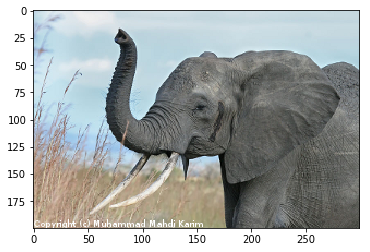

In [24]:
plt.imshow(img);

In [34]:
plt.savefig('plot.png')

plt.imsave('red_elephant.png', img[:,:,0], cmap=plt.cm.gray)

<Figure size 432x288 with 0 Axes>

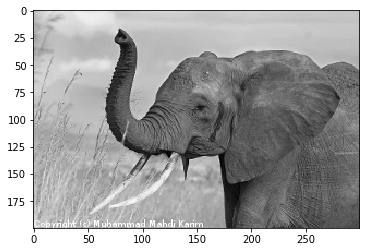

In [33]:
# This saved only one channel (of RGB):
plt.imshow(plt.imread('red_elephant.png'));

## Other libraries: 


e:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  from ipykernel import kernelapp as app


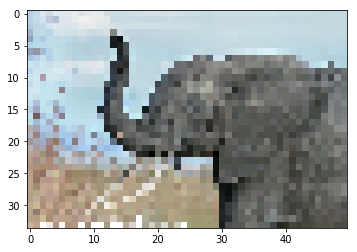

In [37]:
from scipy.misc import imsave
imsave('tiny_elephant.png', img[::6,::6])
plt.imshow(plt.imread('tiny_elephant.png'), interpolation='nearest')  

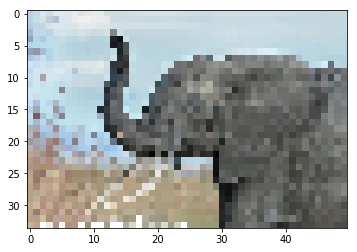

In [38]:
import imageio
imageio.imwrite('tiny_elephant.png', img[::6,::6]);
plt.imshow(plt.imread('tiny_elephant.png'), interpolation='nearest'); 

## Well-known (& more obscure) file formats


* HDF5: h5py, PyTables
* NetCDF: scipy.io.netcdf_file, netcdf4-python, …
* Matlab: `scipy.io.loadmat`, `scipy.io.savemat`
* MatrixMarket: scipy.io.mmread, scipy.io.mmwrite
* IDL: scipy.io.readsav